# Tutorial for dual_autodiff

This tutorial demonstrates how to use the `dual_autodiff` package for forward-mode automatic differentiation using dual numbers.
We will explore:
- Creating and manipulating dual numbers
- Using mathematical operations
- Applying automatic differentiation


In [1]:
# Import the package
from dual_autodiff.dual import Dual
from dual_autodiff.functions import sin, cos, log

# Print a success message
print("dual_autodiff package imported successfully!")


dual_autodiff package imported successfully!


In [2]:
# Create a dual number
x = Dual(2, 1)  # Real part = 2, Dual part = 1

# Display the dual number
print("Dual number:", x)


Dual number: 2 + 1ε


In [3]:
# Perform mathematical operations
print("sin(x):", sin(x))
print("cos(x):", cos(x))
print("log(x):", log(x))

# Combine with another dual number
y = Dual(3, 0.5)
result = x + y * log(x)
print("Result of x + y * log(x):", result)


sin(x): 0.9092974268256817 - 0.4161468365471424ε
cos(x): -0.4161468365471424 - 0.9092974268256817ε
log(x): 0.6931471805599453 + 0.5ε
Result of x + y * log(x): 4.079441541679836 + 2.8465735902799727ε


In [4]:
# Function definition using Dual numbers
def f(x):
    return log(sin(x)) + x**2 * cos(x)

# Compute f(x) and its derivative at x = 1.5
x_val = Dual(1.5, 1)
result = f(x_val)

print(f"f(1.5): {result.real}")
print(f"f'(1.5): {result.dual}")


f(1.5): 0.15665054756073515
f'(1.5): -1.9612372705533612


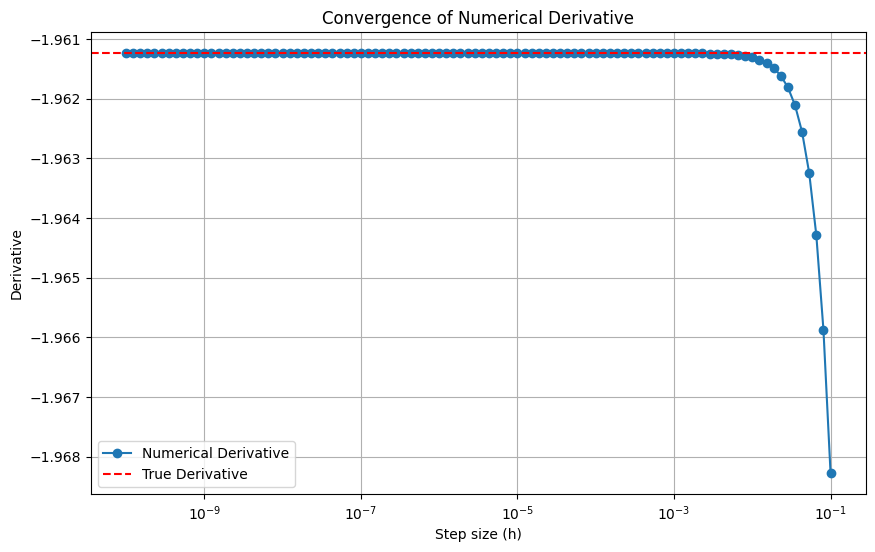

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical derivative using finite differences
def numerical_derivative(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Function for numerical computation
def f_numeric(x):
    return np.log(np.sin(x)) + x**2 * np.cos(x)

# Compute derivatives for decreasing step sizes
x_val = 1.5
steps = np.logspace(-1, -10, 100)
numerical_results = [numerical_derivative(f_numeric, x_val, h) for h in steps]

# True value for comparison
true_derivative = f(Dual(x_val, 1)).dual

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(steps, numerical_results, label="Numerical Derivative", marker='o')
plt.axhline(y=true_derivative, color='r', linestyle='--', label="True Derivative")
plt.xscale("log")
plt.xlabel("Step size (h)")
plt.ylabel("Derivative")
plt.title("Convergence of Numerical Derivative")
plt.legend()
plt.grid()
plt.show()


### Conclusion

This tutorial demonstrated:
- Creating and manipulating dual numbers.
- Using mathematical operations and derivatives.
- Comparing dual number differentiation with numerical methods.

The `dual_autodiff` package is a powerful tool for forward-mode automatic differentiation, ensuring accuracy and stability in derivative computations.
